In [349]:
import pandas as pd 
import time

from ast import literal_eval
import numpy as np
from datetime import datetime
from pymongo import MongoClient
import matplotlib.pyplot as plt 

import Filter2 as fil2

In [3]:
t0 = time.time()
client = MongoClient()
db = client.test_database
collection = db.test_collection

reviewsMongo = db.reviews_mini
restaurantsMongo = db.restaurants

allDataLem = pd.DataFrame(list(reviewsMongo.find({})))
t1 = time.time()
print("Database converted in: " + str((t1-t0)/60))
del allDataLem["_id"]
allDataLem = allDataLem.astype({'stars': np.int8})
t2 = time.time()
print("allDataLem done in: " + str((t2-t0)/60))
restaurantNames = pd.DataFrame(list(restaurantsMongo.find({})))
#del restaurantNames["_id"]
#restaurantNames = restaurantNames.to_json(orient='records')
#t3 = time.time()
#print("Restaurants done in: " + str((t3-t2)/60))
#print("All done in: " + str((t3-t0)/60))

Database converted in: 1.252437957127889
allDataLem done in: 1.3636055906613669


NameError: name 't3' is not defined

In [299]:
restaurantsMongo = db.restaurants
restaurantNames = pd.DataFrame(list(restaurantsMongo.find({})))
restaurantNames

,_id,newID,1_star,2_star,3_star,4_star,5_star
0,5e03298346a9e0f2990006c0,"""Mon Ami Gabi"" - 89109",234,413,852,2565,3264
1,5e03298346a9e0f2990006c1,"""Bacchanal Buffet"" - 89109",667,611,1098,1896,2716
2,5e03298346a9e0f2990006c2,"""Wicked Spoon"" - 89109",409,633,1151,1909,1836
3,5e03298346a9e0f2990006c3,"""Gordon Ramsay BurGR"" - 89109",315,476,874,1570,2184
4,5e03298346a9e0f2990006c4,"""Earl of Sandwich"" - 89109",97,193,597,1643,2453
...,...,...,...,...,...,...,...
38939,5e03298346a9e0f299009edb,"""Second Cup"" - L6V 4K2",1,0,0,4,6
38940,5e03298346a9e0f299009edc,"""Inferno Gourmet Burger Bar"" - 44256",3,2,2,3,1
38941,5e03298346a9e0f299009edd,"""Baja Fresh Las Vegas"" - 89102",2,1,3,1,4
38942,5e03298346a9e0f299009ede,"""Second Cup"" - H3H 2S7",4,1,3,0,3


In [358]:
#del allDataLem["lemmas"]
allDataLem2 = allDataLem.copy()
#allDataLem2 = allDataLem2.tail(10)
allDataLem3 = allDataLem2.copy()
allDataLem3

,business_id,new_name,date,stars
0,4JNXUYY8wbaaDmk3BPzlWw,"""Mon Ami Gabi"" - 89109",2017-08-02,5
1,4JNXUYY8wbaaDmk3BPzlWw,"""Mon Ami Gabi"" - 89109",2013-03-16,3
2,4JNXUYY8wbaaDmk3BPzlWw,"""Mon Ami Gabi"" - 89109",2013-01-04,4
3,4JNXUYY8wbaaDmk3BPzlWw,"""Mon Ami Gabi"" - 89109",2010-07-02,4
4,4JNXUYY8wbaaDmk3BPzlWw,"""Mon Ami Gabi"" - 89109",2017-08-04,5
...,...,...,...,...
3346019,nD_7R5bVxRYNHKv_dGlhBA,"""Timbers Rancho"" - 89130",2017-08-18,1
3346020,nD_7R5bVxRYNHKv_dGlhBA,"""Timbers Rancho"" - 89130",2017-10-13,4
3346021,nCjsK9-_xH0bxuEqdAc8TA,"""Budweiser Racing Track Bar & Grill"" - 89119",2009-05-22,5
3346022,nCjsK9-_xH0bxuEqdAc8TA,"""Budweiser Racing Track Bar & Grill"" - 89119",2013-05-14,2


In [359]:
allDataLem3['date'] = pd.to_datetime(allDataLem3['date'])
allDataLem3['toordinal'] = allDataLem3['date'].apply(datetime.toordinal)
del allDataLem3["date"]
del allDataLem3["business_id"]
#allDataLem3.sort_values(by=['toordinal'], inplace = True)
allDataLem3

,new_name,stars,toordinal
0,"""Mon Ami Gabi"" - 89109",5,736543
1,"""Mon Ami Gabi"" - 89109",3,734943
2,"""Mon Ami Gabi"" - 89109",4,734872
3,"""Mon Ami Gabi"" - 89109",4,733955
4,"""Mon Ami Gabi"" - 89109",5,736545
...,...,...,...
3346019,"""Timbers Rancho"" - 89130",1,736559
3346020,"""Timbers Rancho"" - 89130",4,736615
3346021,"""Budweiser Racing Track Bar & Grill"" - 89119",5,733549
3346022,"""Budweiser Racing Track Bar & Grill"" - 89119",2,735002


In [301]:
#newDF = pd.DataFrame(columns=['new_name', 'change'])
restaurantNames2 = restaurantNames.copy()
restaurantNames2['change'] = np.nan
restaurantNames2

,_id,newID,1_star,2_star,3_star,4_star,5_star,change
0,5e03298346a9e0f2990006c0,"""Mon Ami Gabi"" - 89109",234,413,852,2565,3264,NaN
1,5e03298346a9e0f2990006c1,"""Bacchanal Buffet"" - 89109",667,611,1098,1896,2716,NaN
2,5e03298346a9e0f2990006c2,"""Wicked Spoon"" - 89109",409,633,1151,1909,1836,NaN
3,5e03298346a9e0f2990006c3,"""Gordon Ramsay BurGR"" - 89109",315,476,874,1570,2184,NaN
4,5e03298346a9e0f2990006c4,"""Earl of Sandwich"" - 89109",97,193,597,1643,2453,NaN
...,...,...,...,...,...,...,...,...
38939,5e03298346a9e0f299009edb,"""Second Cup"" - L6V 4K2",1,0,0,4,6,NaN
38940,5e03298346a9e0f299009edc,"""Inferno Gourmet Burger Bar"" - 44256",3,2,2,3,1,NaN
38941,5e03298346a9e0f299009edd,"""Baja Fresh Las Vegas"" - 89102",2,1,3,1,4,NaN
38942,5e03298346a9e0f299009ede,"""Second Cup"" - H3H 2S7",4,1,3,0,3,NaN


In [365]:
allDataLem4 = allDataLem3.copy()
allDataLem4 = allDataLem4.astype({'new_name': 'str'})
#newDF = pd.DataFrame(columns=['new_name', 'change'])
#newDF['new_name'] = allDataLem3['new_name'].unique()
t0 = time.time()
def newFrame(restaurantsDF, df):
    
    #newDF = pd.DataFrame(columns=['new_name', 'change'])
    #newDF['new_name'] = df['new_name'].unique()
    for i in df['new_name']:  
        if i.endswith(' - nan'):
            print(i)
    return
    
    for i in restaurantsDF['newID']:  
        if i.startswith('"Starbucks" - '):
            print(i)
            resultDF = fil2.main(df, "", i, "", "", "")
            #indexNames = df[df['new_name'] != str(i)].index
            #resultDF = df.drop(indexNames)
            print(resultDF)
    return
        
        #indexNames = df[df['new_name'] != i].index
        #resultDF = df.drop(indexNames)
        
        #if len(resultDF) != 0:
        #    df = df.drop(resultDF.index)

        #    resultDF.sort_values(by=['toordinal'], inplace = True)
        #    x = np.array(resultDF["toordinal"])
        #    y = np.array(resultDF["stars"])
        #    diff = estimate_coef2(x, y) 

        #    restaurantsDF.loc[restaurantsDF['newID'] == i, 'change'] = diff
        
        
    return restaurantsDF
        
#allDataClu = newFrame(restaurantNames2, allDataLem3)
newFrame(restaurantNames2, allDataLem4)

t1 = time.time()
print("Krai: " + str(t1-t0))
allDataClu

Krai: 0.7121272087097168


,_id,newID,1_star,2_star,3_star,4_star,5_star,change
0,5e03298346a9e0f2990006c0,"""Mon Ami Gabi"" - 89109",234,413,852,2565,3264,0.061986
1,5e03298346a9e0f2990006c1,"""Bacchanal Buffet"" - 89109",667,611,1098,1896,2716,-0.335533
2,5e03298346a9e0f2990006c2,"""Wicked Spoon"" - 89109",409,633,1151,1909,1836,-0.318326
3,5e03298346a9e0f2990006c3,"""Gordon Ramsay BurGR"" - 89109",315,476,874,1570,2184,0.223239
4,5e03298346a9e0f2990006c4,"""Earl of Sandwich"" - 89109",97,193,597,1643,2453,-0.643565
...,...,...,...,...,...,...,...,...
38939,5e03298346a9e0f299009edb,"""Second Cup"" - L6V 4K2",1,0,0,4,6,-1.553489
38940,5e03298346a9e0f299009edc,"""Inferno Gourmet Burger Bar"" - 44256",3,2,2,3,1,-1.571828
38941,5e03298346a9e0f299009edd,"""Baja Fresh Las Vegas"" - 89102",2,1,3,1,4,-1.063324
38942,5e03298346a9e0f299009ede,"""Second Cup"" - H3H 2S7",4,1,3,0,3,-0.777208


In [341]:
i = str('"Starbucks" - nan')
str(i).endswith(" - NaN")

False

In [371]:
#allDataClu.to_csv('restNamesClu.csv')
allDataClu2 = allDataClu.copy()
allDataClu2 = allDataClu2.sort_values("change")
#.tail(50)
allDataClu2.drop(allDataClu2.tail(50).index,inplace=True)
allDataClu2.sort_index()

,_id,newID,1_star,2_star,3_star,4_star,5_star,change
0,5e03298346a9e0f2990006c0,"""Mon Ami Gabi"" - 89109",234,413,852,2565,3264,0.061986
1,5e03298346a9e0f2990006c1,"""Bacchanal Buffet"" - 89109",667,611,1098,1896,2716,-0.335533
2,5e03298346a9e0f2990006c2,"""Wicked Spoon"" - 89109",409,633,1151,1909,1836,-0.318326
3,5e03298346a9e0f2990006c3,"""Gordon Ramsay BurGR"" - 89109",315,476,874,1570,2184,0.223239
4,5e03298346a9e0f2990006c4,"""Earl of Sandwich"" - 89109",97,193,597,1643,2453,-0.643565
...,...,...,...,...,...,...,...,...
38939,5e03298346a9e0f299009edb,"""Second Cup"" - L6V 4K2",1,0,0,4,6,-1.553489
38940,5e03298346a9e0f299009edc,"""Inferno Gourmet Burger Bar"" - 44256",3,2,2,3,1,-1.571828
38941,5e03298346a9e0f299009edd,"""Baja Fresh Las Vegas"" - 89102",2,1,3,1,4,-1.063324
38942,5e03298346a9e0f299009ede,"""Second Cup"" - H3H 2S7",4,1,3,0,3,-0.777208


In [376]:
#allDataClu2 = allDataClu2.sort_index()
#del allDataClu2["_id"]
allDataClu2.dtypes

newID      object
1_star      int64
2_star      int64
3_star      int64
4_star      int64
5_star      int64
change    float64
dtype: object

In [377]:
client = MongoClient()
db = client.test_database
collection = db.test_collection

#posts = db.posts
#posts = db.reviews
#posts = db.reviews_mini
posts = db.restaurants_change

t0 = time.time()
posts.insert_many(allDataClu2.to_dict('records'))
t1 = time.time()
(t1-t0)/60

0.01675573984781901

In [285]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

def estimate_coef2(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
    
    # Difference between the values at the beggining and the end of the regression line
    start = b_0 + b_1*x[0] 
    #print(start)
    end = b_0 + b_1*x[-1]  
    #print(end)   
    result = end - start
  
    return result 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
    print(y_pred)
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show() 

Trqbva da e: -3.6000137697719765
Estimated coefficients:
b_0 = -1518.1435953961254 nb_1 = 0.0020677850486915173
[ 4.85660101  0.76031883  4.15562188  2.25325964  3.43189711  1.83349927
  4.71185606  3.27267766  2.07129455 -0.19086229  3.2954233   2.42281801
  4.86900772  1.25658724]


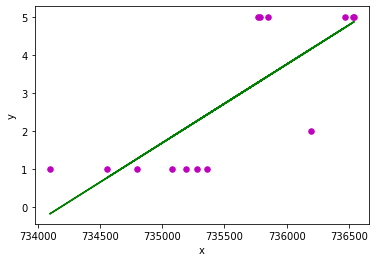

In [367]:
# observations 
#x = np.array([0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
#x = np.array([pd.to_datetime("2010-08-02").toordinal(), pd.to_datetime("2010-08-03").toordinal(), pd.to_datetime("2010-09-02").toordinal(), pd.to_datetime("2011-08-02").toordinal()])
#y = np.array([5, 2, 5, 2]) 
proba = fil2.main(allDataLem3, "", '"Subway" - 85304', "", "", "")
x = np.array(proba["toordinal"])
y = np.array(proba["stars"])
print("Trqbva da e: " + str(estimate_coef2(x, y)))

# estimating coefficients 
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {} nb_1 = {}".format(b[0], b[1])) 

# plotting regression line 
plot_regression_line(x, y, b) 


In [282]:
y_pred = b[0] + b[1]*x[-1] 
y_pred
print(str(b[0] + b[1]*x[0]) + " and " + str(b[0] + b[1]*x[-1]))
#pd.to_datetime("2010-08-02").to_julian_date()
#pd.to_datetime("2011-09-13").toordinal()

2.0541911543439255 and 2.4945318608700973


In [155]:
def forPeriod(item, average):
        
    revSam3 = item
        
    #revSam3['date'] = pd.to_datetime(revSam3.date)
    #revSam3['date'] = revSam3.date.map(lambda x: x.strftime('%Y-%m'))
    
    if average == "median" or average == "Median":
        revMedian = revSam3.groupby(['toordinal', 'new_name'])['stars'].median()
    elif average == "mean" or average == "Mean":
        revMedian = revSam3.groupby(['toordinal', 'new_name'])['stars'].mean()
        print(revMedian)
    revMedian = pd.DataFrame(data=revMedian)
    revMedian.rename(columns = {'stars':'median'}, inplace = True)
    revMedian = revMedian.pivot_table(index='toordinal',columns='new_name', values={'median'},aggfunc='sum')
    revMedian.columns =  revMedian.columns.droplevel(level = 0)
        
    #revMedian = hot_deck(revMedian)
    
    return revMedian

In [156]:
forPeriod(allDataLem3, "Mean")

toordinal  new_name              
733955     "Mon Ami Gabi" - 89109    4
734872     "Mon Ami Gabi" - 89109    4
734943     "Mon Ami Gabi" - 89109    3
735026     "Mon Ami Gabi" - 89109    4
735049     "Mon Ami Gabi" - 89109    2
735244     "Mon Ami Gabi" - 89109    4
735246     "Mon Ami Gabi" - 89109    4
735557     "Mon Ami Gabi" - 89109    4
736543     "Mon Ami Gabi" - 89109    5
736545     "Mon Ami Gabi" - 89109    5
Name: stars, dtype: int8


new_name,"""Mon Ami Gabi"" - 89109"
toordinal,
733955,4
734872,4
734943,3
735026,4
735049,2
735244,4
735246,4
735557,4
736543,5


In [102]:
def main(data):
    #data = readCSV('static/revSamLem2.csv')
    
    data["newID"] = data["name"].map(str) +" - "+ data["postal_code"].map(str)
    data.drop(data.columns[[0,2,3,4,5,6,7]],axis=1,inplace=True)
    
    data = pd.DataFrame(data.groupby(data.columns.tolist(),as_index=True).size()).reset_index()
    data = data.rename(columns={0: "count"})
    data = data.pivot(index='newID', columns='stars', values='count').reset_index()
    data = data.rename(columns={1: "1_star", 2: "2_star", 3: "3_star", 4: "4_star", 5: "5_star", })
    
    data['total'] = data[['1_star', '2_star', '3_star', '4_star', '5_star']].sum(axis=1) 
    data = data.sort_values(by=['total'], ascending=False)
    data.drop("total",axis=1,inplace=True)
    
    return data

In [326]:
def readCSV(item):
    data = pd.read_csv(item, dtype={0: int}, index_col=0, encoding='latin-1')
    df = pd.DataFrame(data)
    return df

In [327]:
allData = readCSV('static/revSamLem2.csv')
allData2 = allData.copy()
allData2

C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Bogy\Anaconda3\envs\Envir. Python 3.6\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,business_id,stars,date,text,name,postal_code,ccur,lemmas
index,,,,,,,,
441370,4JNXUYY8wbaaDmk3BPzlWw,5,2017-08-02,Dont miss the peppercorn steak . The peppercor...,"""Mon Ami Gabi""",89109,7328,"['do', 'miss', 'peppercorn', 'steak', 'pepperc..."
443424,4JNXUYY8wbaaDmk3BPzlWw,3,2013-03-16,This is a great place to come during the summe...,"""Mon Ami Gabi""",89109,7328,"['great', 'place', 'come', 'summer', 'patio', ..."
444590,4JNXUYY8wbaaDmk3BPzlWw,4,2013-01-04,Mon Ami Gabi is practically a landmark. In fac...,"""Mon Ami Gabi""",89109,7328,"['mon', 'ami', 'gabi', 'practically', 'landmar..."
444589,4JNXUYY8wbaaDmk3BPzlWw,4,2010-07-02,Having done Vegas (at least once) every year f...,"""Mon Ami Gabi""",89109,7328,"['do', 'vega', 'little', 'every', 'year', 'pas..."
444588,4JNXUYY8wbaaDmk3BPzlWw,5,2017-08-04,"To start with, I'm French and I'm a Vegas loca...","""Mon Ami Gabi""",89109,7328,"['start', 'french', 'vega', 'local', 'time', '..."
...,...,...,...,...,...,...,...,...
4217597,nD_7R5bVxRYNHKv_dGlhBA,1,2017-08-18,Bar is absolute trash. Came in spend over 150 ...,"""Timbers Rancho""",89130,11,"['bar', 'absolute', 'trash', 'come', 'spend', ..."
4217596,nD_7R5bVxRYNHKv_dGlhBA,4,2017-10-13,Nice place! I am a non-smoker and although a f...,"""Timbers Rancho""",89130,11,"['nice', 'place', 'non', 'smoker', 'although',..."
4216771,nCjsK9-_xH0bxuEqdAc8TA,5,2009-05-22,Are you kidding me?? 1 star? \r\r\r\n\r\r\r\nO...,"""Budweiser Racing Track Bar & Grill""",89119,11,"['kid', '1', 'star', 'okay', 'let', 'say', 'ba..."


In [332]:
allData2 = allData.copy()
indexNames = df[df['new_name'] != i].index
resultDF = df.drop(indexNames)

,business_id,stars,date,text,name,postal_code,ccur,lemmas
index,,,,,,,,
3078885,_Fe6OFmVFAjwAXjkhZtIhw,5,2015-04-01,Some friends and I went here for lunch on the ...,"""Martone's Market & CafÃ©""",05452,49,"['friend', 'go', 'lunch', 'recommendation', 'o..."
3078903,_Fe6OFmVFAjwAXjkhZtIhw,5,2013-06-05,The best sandwhich shop I know. Great bread pi...,"""Martone's Market & CafÃ©""",05452,49,"['well', 'sandwhich', 'shop', 'know', 'great',..."
3078897,_Fe6OFmVFAjwAXjkhZtIhw,2,2012-02-27,Martones is a great quick in and out for lunch...,"""Martone's Market & CafÃ©""",05452,49,"['martones', 'great', 'quick', 'lunch', 'somet..."
3078904,_Fe6OFmVFAjwAXjkhZtIhw,5,2014-08-16,I wish we had a great sandwich shop in Arizon...,"""Martone's Market & CafÃ©""",05452,49,"['wish', 'great', 'sandwich', 'shop', 'arizona..."
3078905,_Fe6OFmVFAjwAXjkhZtIhw,4,2015-06-10,"One of the best! The bread is amazing, the mea...","""Martone's Market & CafÃ©""",05452,49,"['one', 'well', 'bread', 'amaze', 'meat', 'che..."
...,...,...,...,...,...,...,...,...
4243455,nYWsw2yI8xigISLiBxDudg,1,2013-11-14,"Sorry, but st viator bagels alone are not enou...","""Bagel Bar""",nan,20,"['sorry', 'st', 'viator', 'bagel', 'alone', 'e..."
4243454,nYWsw2yI8xigISLiBxDudg,1,2016-09-06,"Terrible bagels! They were not fresh--dry, me...","""Bagel Bar""",nan,20,"['terrible', 'bagel', 'fresh', 'spin-dry', 'me..."
4243453,nYWsw2yI8xigISLiBxDudg,3,2013-03-30,Ok not reviewing the food but just mentioning ...,"""Bagel Bar""",nan,20,"['okay', 'review', 'food', 'mention', 'place',..."


In [64]:
allData2 = allData.copy()
allData2 = main(allData2)

In [65]:
allData2 = allData2.fillna(0)
allData2

stars,newID,1_star,2_star,3_star,4_star,5_star
21672,"""Mon Ami Gabi"" - 89109",234.0,413.0,852.0,2565.0,3264.0
2060,"""Bacchanal Buffet"" - 89109",667.0,611.0,1098.0,1896.0,2716.0
37792,"""Wicked Spoon"" - 89109",409.0,633.0,1151.0,1909.0,1836.0
13238,"""Gordon Ramsay BurGR"" - 89109",315.0,476.0,874.0,1570.0,2184.0
9975,"""Earl of Sandwich"" - 89109",97.0,193.0,597.0,1643.0,2453.0
...,...,...,...,...,...,...
29388,"""Second Cup"" - L6V 4K2",1.0,0.0,0.0,4.0,6.0
15435,"""Inferno Gourmet Burger Bar"" - 44256",3.0,2.0,2.0,3.0,1.0
2175,"""Baja Fresh Las Vegas"" - 89102",2.0,1.0,3.0,1.0,4.0
29384,"""Second Cup"" - H3H 2S7",4.0,1.0,3.0,0.0,3.0


In [66]:
allData2 = allData2.astype({'1_star': 'int32', '2_star': 'int32', '3_star': 'int32', '4_star': 'int32', '5_star': 'int32'})
allData2

stars,newID,1_star,2_star,3_star,4_star,5_star
21672,"""Mon Ami Gabi"" - 89109",234,413,852,2565,3264
2060,"""Bacchanal Buffet"" - 89109",667,611,1098,1896,2716
37792,"""Wicked Spoon"" - 89109",409,633,1151,1909,1836
13238,"""Gordon Ramsay BurGR"" - 89109",315,476,874,1570,2184
9975,"""Earl of Sandwich"" - 89109",97,193,597,1643,2453
...,...,...,...,...,...,...
29388,"""Second Cup"" - L6V 4K2",1,0,0,4,6
15435,"""Inferno Gourmet Burger Bar"" - 44256",3,2,2,3,1
2175,"""Baja Fresh Las Vegas"" - 89102",2,1,3,1,4
29384,"""Second Cup"" - H3H 2S7",4,1,3,0,3


In [67]:
allData2.to_csv('stackedData2.csv')